## Проект e-commerce: вариант 1

Счастливый Дмитрий, K/C, 50-й поток

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
# import matplotlib.dates as mdates
# import plotly.express as px

In [2]:
size = 16
params = {
    "legend.fontsize": "large",
    "figure.figsize": (16, 8),
    "axes.titlesize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
}
plt.rcParams.update(params)

In [3]:
# отключение предупреждений вида "FutureWarning messages"
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action="ignore", category=FutureWarning)

## 1. Выгрузка и изучение имеющихся данных.

### 1.1. Анализ данных покупателей из "olist_customers_dataset"

In [4]:
# Считываем данные из файла в датафрейм
customers_df = pd.read_csv("olist_customers_dataset.csv")

In [5]:
# Беглый осмотр данных
customers_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,931c6a6d642ffe492b4992e2f7f03e12,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Предварительные выводы по таблице покупателей (customers_df):  
- пропусков нет;    
- кол-во уникальных покупателей составляет около 96% от встречающихся. Следовательно большинство из них оплачивало лишь однажды;  
- максимальное кол-во покупок на одного клиента = 17;  
- широкий регион охвата у компании (27 штатов, 4119 населенных пунктов);
- большиство покупок совершается в штате с кодом SP (около 41%). Значительная часть из них - в городе São Paulo (Сан-Па́улу, Бразилия).

### 1.2. Анализ данных о товарных позициях в заказах из "olist_order_items_dataset"

In [8]:
# Считываем данные из файла в датафрейм и преобразовываем данные в столбце с датой и временем в соответствующий формат
order_items_df = pd.read_csv(
    "olist_order_items_dataset.csv", parse_dates=["shipping_limit_date"]
)

In [9]:
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [10]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [11]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


Предварительные выводы по таблице товарных позиций, входящих в заказы (order_items_df):  
- пропусков нет;
- 98666	заказов с ценой;
- максимальное кол-во позиций в одном заказе = 21;
- большинство заказов содержат одну позицию;
- представлена широкая линейка товаров (32951 товарных позиций), самый популярный товар приобретался 527 раз.
- производителей товаров 3095, наиболее частый встречается 2033 раза в товарных позициях заказа.
- данные собраны в промежутке между 2016-09 и 2020-04-09 (далее период будет уточнен);
- ценовой диапазон приобретаемых товаров от 0,85 до 6735 с медианной в 75;  

- ценовой диапазон за доставку товара от 0 до 409,68.  
freight_value скорее всего не "вес товара", а, судя из названия, - значения фрахта (стоимости перевозки груза).  
Подтверждено.  
Пример: product_id = 'd41dc2f2979f52d75d78714b378d4068', freight_value меняется от 12.48 до 34.15 у одного продавца.

Вместо указания количества товара, для каждой единицы товара своя строка, пример заказ '7a067b571c19eb71f647423ceba78fbe'. В нем три одинаковых товара (совпадает product_id) каждый на своей строке.

### 1.3. Анализ данных о статусах заказов из "olist_orders_dataset"

In [12]:
# Считываем данные из файла в датафрейм и преобразовываем данные в столбцах с датой и временем в соответствующий формат
orders_df = pd.read_csv(
    "olist_orders_dataset.csv",
    parse_dates=[
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
    ],
)

In [13]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [15]:
# Преименование колонок для удобства

orders_df = orders_df.rename(
    columns={
        "order_purchase_timestamp": "purchase",
        "order_approved_at": "approved_at",
        "order_delivered_carrier_date": "carrier_get",
        "order_delivered_customer_date": "customer_get",
        "order_estimated_delivery_date": "estimated_dt",
    }
)
orders_df.head(3)

,order_id,customer_id,order_status,purchase,approved_at,carrier_get,customer_get,estimated_dt
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [16]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,purchase,approved_at,carrier_get,customer_get,estimated_dt
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,b82f05ed1c1a8045489ff9ee86415c9c,931c6a6d642ffe492b4992e2f7f03e12,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [17]:
# Количество заказов в разных статусах за вёсь период.

orders_df.groupby("order_status").agg({"order_id": "count"})

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


Предварительные выводы по таблице заказов (orders_df):  
- наличие пропусков;
- order_estimated_delivery_date устанавливается при создании заказа (количетсво заполненных значений в этой колонке = количетсву всех заказов с учетом 5-ти в статусе "created").
- свыше 99% заказов с проставленным временем "подтверждения оплаты заказа" (99281 из 99441). 
- около 97% заказов со статусом "доставлено" (96476 из 99441).

Перед нами данные компании Olist (название из имени файлов + регионы одной из таблиц).  
Olist — бразильский стартап, работающий в сегменте технологий розничной торговли. У компании есть решения, облегчающие управление офлайн- и интернет-магазинами (электронной коммерцией), а также решение для ускорения продаж внутри крупных маркетплейсов ("Амазон" и подобные). В магазин olist интегрировано более 10 крупных веб-сайтов.   
Доступ осуществляется по SaaS модели.   
С одной стороны, Олист концентрирует продавцов, желающих разместить рекламу на таких торговых площадках, с другой стороны, он концентрирует товары всех продавцов в одном магазине, который виден конечному потребителю.  
Магазин Olist предлагает эксклюзивные преимущества, такие как:
- Высокая репутация на маркетплейсах;
- Большие шансы занять лучшие позиции (купить ящики);
- Интегрированное управление и простота эксплуатации;
- Аналитика рынка для бизнеса;
- Улучшенная поддержка магазина и покупателей;
- Команды, занимающиеся обзором каталогов и послепродажным обслуживанием;
- Больше практичности и экономии при отправке заказов благодаря эксклюзивному договору с Почтой, более привлекательной и дешевле на 15% доставки.   
(возможно часть из этого списка не была доступна в 2017-2018 годах)

Источники:
https://ajuda.olist.com/hc/pt-br/articles/4409242128916-Entenda-o-que-%C3%A9-e-como-funciona-o-Olist-Store  ,
википедия (португальская), статьи о компани в Бразильском сегменте.

_!!! Внимание: далее значения с датой и временем по каждому заказу будет именоваться "этапом" для удобства передачи смысла происходящего._

In [18]:
# Сделаем разбивку заказов по этапам и месяцу создания заказа во временном датафрейме.

temp_df = orders_df.copy()
temp_df["create_month"] = temp_df["purchase"].astype(str).str.slice(0, 7)
temp_df.groupby("create_month").count()

,order_id,customer_id,order_status,purchase,approved_at,carrier_get,customer_get,estimated_dt
create_month,,,,,,,,
2016-09,4,4,4,4,4,2,1,4
2016-10,324,324,324,324,318,278,270,324
2016-12,1,1,1,1,1,1,1,1
2017-01,800,800,800,800,797,766,750,800
2017-02,1780,1780,1780,1780,1766,1674,1653,1780
2017-03,2682,2682,2682,2682,2680,2591,2546,2682
2017-04,2404,2404,2404,2404,2400,2352,2303,2404
2017-05,3700,3700,3700,3700,3691,3600,3545,3700
2017-06,3245,3245,3245,3245,3241,3182,3135,3245


Есть смысл рассматривать данные только за период с 2017-01 по 2018-08 включительно:  
- в 2016-м неполные данные. Хоть и представлено немало заказов за октябрь 2016, но велика вероятность что была обнаружена ошибка в работе платформы, из-за чего за следующие два месяца проведен лишь один заказ.  
- после августа 2018 заказов слишком мало, вероятно из-за некорректной выгрузки данных.

In [19]:
# Используем данные только за период с 2017-01 по 2018-08 включительно.

start_date = "2017-01-01 00:00:00"
end_date = "2018-09-01 00:00:00"

orders_df = orders_df.query("purchase >= @start_date and purchase < @end_date")
print(f"Количество записей = {len(orders_df)}\n")
print(f"Минимальная дата создания заказа = {orders_df.purchase.min()}\n")
print(f"Максимальная дата создания заказа = {orders_df.purchase.max()}\n")

Количество записей = 99092

Минимальная дата создания заказа = 2017-01-05 11:56:06

Максимальная дата создания заказа = 2018-08-31 16:13:44



_Маленькая сноска: далее не привожу проверку при получении каких-либо значений, чтобы уменьшить кол-во блоков кода, поверьте, она осуществлялась._

### 1.4. Жизненный путь заказов

Чтобы определится что именно считать покупкой и какие заказы считать доставленными/недоставленными, необходимо более детально рассмотреть изменение статусов заказов.  

Данный шаг позволит увидеть взаимосвязь статуса заказа с проставленными по времени этапами, возможные аномалии, зависимость различных этапов друг от друга, предположить возможные причины отмены заказов.

In [20]:
# Подтянем в датафрейм orders_df значение shipping_limit_date,
# чтобы в дальнейшем проанализировать зависит ли превышение данного срока на статус заказа.

items_and_shipping_limits_df = (
    order_items_df[["order_id", "shipping_limit_date"]]
    .drop_duplicates(subset=["order_id"])
    .reset_index(drop=True)
)

order_path_df = orders_df.merge(
    items_and_shipping_limits_df, how="left", on="order_id"
).drop("customer_id", axis=1)


order_path_df.head(3)

,order_id,order_status,purchase,approved_at,carrier_get,customer_get,estimated_dt,shipping_limit_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23


In [21]:
# посмотрим колво непустых значений по столбцам
order_path_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99092 entries, 0 to 99091
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             99092 non-null  object        
 1   order_status         99092 non-null  object        
 2   purchase             99092 non-null  datetime64[ns]
 3   approved_at          98957 non-null  datetime64[ns]
 4   carrier_get          97376 non-null  datetime64[ns]
 5   customer_get         96204 non-null  datetime64[ns]
 6   estimated_dt         99092 non-null  datetime64[ns]
 7   shipping_limit_date  98353 non-null  datetime64[ns]
dtypes: datetime64[ns](6), object(2)
memory usage: 6.8+ MB


In [22]:
# С помощью функции melt разнесём этапы заказа по строкам
order_path_melted_df = order_path_df.melt(
    id_vars=["order_id", "order_status"],
    value_vars=[
        "purchase",
        "approved_at",
        "carrier_get",
        "shipping_limit_date",
        "customer_get",
        "estimated_dt",
    ],
    var_name="order_status_on_date",
    value_name="date",
).dropna()

# сортировка этапов по возрастанию даты и времени для каждого заказа
order_path_melted_df = order_path_melted_df.sort_values(["order_id", "date"])

order_path_melted_df

,order_id,order_status,order_status_on_date,date
84966,00010242fe8c5a6d1ba2dd792cb16214,delivered,purchase,2017-09-13 08:59:02
184058,00010242fe8c5a6d1ba2dd792cb16214,delivered,approved_at,2017-09-13 09:45:35
382242,00010242fe8c5a6d1ba2dd792cb16214,delivered,shipping_limit_date,2017-09-19 09:45:35
283150,00010242fe8c5a6d1ba2dd792cb16214,delivered,carrier_get,2017-09-19 18:34:16
481334,00010242fe8c5a6d1ba2dd792cb16214,delivered,customer_get,2017-09-20 23:43:48
...,...,...,...,...
158626,fffe41c64501cc87c801fd61db3f6244,delivered,approved_at,2018-06-09 17:10:13
257718,fffe41c64501cc87c801fd61db3f6244,delivered,carrier_get,2018-06-11 14:11:00
356810,fffe41c64501cc87c801fd61db3f6244,delivered,shipping_limit_date,2018-06-12 17:10:13
455902,fffe41c64501cc87c801fd61db3f6244,delivered,customer_get,2018-06-14 17:56:26


In [23]:
# объединяем в списки этапы для каждого заказа
orders_status_lists = (
    order_path_melted_df.groupby(["order_id", "order_status"])
    .order_status_on_date.apply(list)
    .reset_index()
)

orders_status_lists

,order_id,order_status,order_status_on_date
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,"[purchase, approved_at, shipping_limit_date, c..."
1,00018f77f2f0320c557190d7a144bdd3,delivered,"[purchase, approved_at, shipping_limit_date, c..."
2,000229ec398224ef6ca0657da4fc703e,delivered,"[purchase, approved_at, carrier_get, shipping_..."
3,00024acbcdf0a6daa1e931b038114c75,delivered,"[purchase, approved_at, carrier_get, customer_..."
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,"[purchase, approved_at, shipping_limit_date, c..."
...,...,...,...
99087,fffc94f6ce00a00581880bf54a75a037,delivered,"[purchase, approved_at, carrier_get, shipping_..."
99088,fffcd46ef2263f404302a634eb57f7eb,delivered,"[purchase, approved_at, carrier_get, shipping_..."
99089,fffce4705a9662cd70adb13d4a31832d,delivered,"[purchase, approved_at, carrier_get, customer_..."
99090,fffe18544ffabc95dfada21779c9644f,delivered,"[purchase, approved_at, carrier_get, customer_..."


In [24]:
orders_status_lists["path"] = orders_status_lists["order_status_on_date"].apply(
    lambda x: " -> ".join(x)
)

orders_status_lists["path"].head(10)

0    purchase -> approved_at -> shipping_limit_date...
1    purchase -> approved_at -> shipping_limit_date...
2    purchase -> approved_at -> carrier_get -> ship...
3    purchase -> approved_at -> carrier_get -> cust...
4    purchase -> approved_at -> shipping_limit_date...
5    purchase -> approved_at -> carrier_get -> cust...
6    purchase -> approved_at -> carrier_get -> ship...
7    purchase -> carrier_get -> approved_at -> cust...
8    purchase -> approved_at -> shipping_limit_date...
9    purchase -> approved_at -> carrier_get -> cust...
Name: path, dtype: object

In [25]:
orders_status_lists = orders_status_lists.drop("order_status_on_date", axis=1)
orders_status_lists

,order_id,order_status,path
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,purchase -> approved_at -> shipping_limit_date...
1,00018f77f2f0320c557190d7a144bdd3,delivered,purchase -> approved_at -> shipping_limit_date...
2,000229ec398224ef6ca0657da4fc703e,delivered,purchase -> approved_at -> carrier_get -> ship...
3,00024acbcdf0a6daa1e931b038114c75,delivered,purchase -> approved_at -> carrier_get -> cust...
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,purchase -> approved_at -> shipping_limit_date...
...,...,...,...
99087,fffc94f6ce00a00581880bf54a75a037,delivered,purchase -> approved_at -> carrier_get -> ship...
99088,fffcd46ef2263f404302a634eb57f7eb,delivered,purchase -> approved_at -> carrier_get -> ship...
99089,fffce4705a9662cd70adb13d4a31832d,delivered,purchase -> approved_at -> carrier_get -> cust...
99090,fffe18544ffabc95dfada21779c9644f,delivered,purchase -> approved_at -> carrier_get -> cust...


In [26]:
orders_paths = (
    orders_status_lists.groupby("order_status")["path"]
    .value_counts()
    .to_frame()
    .rename(columns={"path": "quantity"})
)

orders_paths

quantity
order_status path                                                        
approved     purchase -> approved_at -> shipping_limit_date ...         2
canceled     purchase -> approved_at -> shipping_limit_date ...       370
             purchase -> estimated_dt                                 116
             purchase -> approved_at -> carrier_get -> shipp...        61
             purchase -> approved_at -> estimated_dt                   16
...                                                                   ...
shipped      purchase -> carrier_get -> approved_at -> shipp...         8
             purchase -> approved_at -> carrier_get -> estim...         2
             carrier_get -> purchase -> approved_at -> shipp...         1
unavailable  purchase -> approved_at -> estimated_dt                  599
             purchase -> estimated_dt -> approved_at                    3

[65 rows x 1 columns]

In [27]:
# Расскоментируйте, чтобы скачать файл

# orders_paths.to_excel("orders_paths.xlsx")

Анализ файла дал следующие результаты:  
- Если максимальная дата доставки продавцом для передачи заказа партнеру по логистике ("shipping_limit_date") превышает время передачи заказа в логистическую службу ("order_delivered_carrier_date") заказ может быть доставлен. Возможно продавцу будет штраф (доп. доход для компании).

- Аналогично с "обещанной датой доставки" клиенту, она нередко превышается. (возможные причины будут указаны позже).

- Не везде проставленное время соответствует логике.  
Например: доставка товара в логистическую службу до создания самого заказа или получение товара покупателем до получения товара логистической компанией.

- Часть дат для заказов пропущена.  
(подробнее в следующих блоках кода)

- Значения в order_status не обновляются должным образом. 
Например: заказы с "approved", "invoiced", "processing", "unavailable", "shipped", по которым уже давно истек срок (2017 г.), должны были уже (к концу 2018 г.) автоматически переместиться в "canceled" или в "delivered", если доставка имело место быть, но не прошла по программе.  

- Статус "unavaliable" (недоступен). Скорее всего возникает при отсутствии товарных позиций на складе поставщика.  
Возможная причина: остатки отображались не верно на сайте.

In [28]:
# Нестыковки.
# <Эти два блока - несущественная часть работы, дабы скрыть вывод блоков, закомментировал.
# При желании, раскоментируйте код и запустите ячейки.>

# Заказы с датой передачи в логистическую службу и без отметки о якобы оплате (approved_at)
# order_path_df.query("approved_at.isnull() & shipping_limit_date.notnull()")

# -- 14 шт., все заказы в статусе "доставлен",
# имеют следующие даты создания: 2017-01-19, 2017-02-17, 2017-02-18.
# Помимо данных заказов были десятки других в эти даты, подобной аномалии у остальных нет.
# Наиболее вероятная причина: сбой при оплате.

In [29]:
# Другие записи по заказам с пропусками этапов:

# "доставленные" без даты в "customer_get"
# order_path_df.query("order_status == 'delivered' & customer_get.isnull()")
# -- 8 шт.

# "доставленные" без даты в "carrier_get" с датой в  "customer_get"
# order_path_df.query("order_status == 'delivered' & carrier_get.isnull() & customer_get.notnull()")
# -- 1 шт.

Все вышеперечисленные заказы с пропущенными этапами со статусом "delivered" считаем как оплаченные и доставленые.

Для наглядности и удобства разделим весь "жизненный путь" заказа на стадии:  
(+ означает заполненную дату и время на указанном этапе)

1. Заказ СОЗДАН (скорее всего сразу после оплаты клиентом).  
order_purchase_timestamp (purchase) + 

2. ПОДТВЕРЖДЁНО получение оплаты.  
order_approved_at (approved_at) + 

3. Наличие товара у продавца/-цов проверено. Товар собирается и отправляется в логистическую службу.  
shipping_limit_date +

4. ПЕРЕДАН в логистическую службу для доставки клиенту.  
order_delivered_carrier_date (carrier_get) +

5. ДОСТАВЛЕН клиенту.  
order_estimated_delivery_date (customer_get) +  или статус "delivered"

In [30]:
# создаём временный датафрейм из копии существующего, для безопасных манипуляций с данными
temp2_df = order_path_df.copy()
temp2_df.head(3)

,order_id,order_status,purchase,approved_at,carrier_get,customer_get,estimated_dt,shipping_limit_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23


In [31]:
# Функция, которая создаёт столбец 'stage' (стадия) на основе наличия этапов у заказа
def new_column_value(row):
    if (row[1] == "delivered") | (pd.notnull(row[5])):  # "delivered" или customer_get +
        return "5"
    elif pd.notnull(row[4]):  # carrier_get +
        return "4"
    elif pd.notnull(row[7]):  # shipping_limit_date +
        return "3"
    elif pd.notnull(row[3]):  # approved_at +
        return "2"
    else:  # purchase +
        return "1"

Заказы со статусом "canceled" (отмененные) будут учтены согласно произошедшему с заказом событию (создан / собран / доставлен в лог. службу / клиенту) как и все остальные статусы.

In [32]:
# Применим функцию к новому столбцу датафрейма
temp2_df["stage"] = temp2_df.apply(new_column_value, axis=1)

# количество заказов на разных стадиях
temp2_df.stage.value_counts()

5    96212
4     1166
3      975
2      618
1      121
Name: stage, dtype: int64

In [33]:
# Наглядно таблица количество заказов с разными статусами и на разных стадиях
status_stage_pt = pd.pivot_table(
    temp2_df,
    values="order_id",
    index=["order_status"],
    columns=["stage"],
    aggfunc="count",
)

status_stage_pt = status_stage_pt

status_stage_pt.fillna("-")

stage,1,2,3,4,5
order_status,,,,,
approved,-,-,2,-,-
canceled,116,16,378,69,1
created,5,-,-,-,-
delivered,-,-,-,-,96211
invoiced,-,-,296,-,-
processing,-,-,299,-,-
shipped,-,-,-,1097,-
unavailable,-,602,-,-,-


### 1.5. Покупка

Учитывая специфику бизнеса, покупкой должно быть приобретение пакетов услуг компании розничными торговцами, но соответствующих данных у нас нет.  
Следовательно под "покупками" понимаются продажи розничных торговцев с использованием сервиса данной компании.  

Варианты что считать "покупкой":
1) все представленные заказы, так как номер создания заказа выдаётся при оплате.
Но оплата не всегда подтвеждается. Вариант не подходит.

2) все заказы с "время подтверждения оплаты заказа" (факт что оплата прошла).  
Минус подхода: среди данных заказов, есть такие, которые не были собраны продавцами и отправлены далее по логистической цепочке. Данные по таким заказам отсутствуют в order_items_df (olist_order_items_dataset.csv), по ним неизвестна стоимость заказа. Это 100% возвраты сумм. Вариант не подходит. 

3) ориентироваться на заказы со статусом, например, approved или последующим, то есть заказы присутствующие в order_items_df (собранные и отправленные в логистическую службу).   
Оплачены, оплата подтверждена (покупка состоялась), как и наличие товара у продавца.  
Заказы укомплектованы и имеет дату shipping_limit_date (имеется стоимость заказа).   
Заказы со статусами: invoiced, approved, processing, shipped, delivered и часть из canceled (с соответствующими признаками). Это соответствует стадиям 3-5 включительно.   
Интересный вариант, остановлюсь на нём.

4) только заказы со статусом "delivered".  
Как 100% совершенные. _(скука)_   

' _напоминаю, работа с данными за период с 2017-01 по 2018-08 включительно_

In [34]:
# Создаём датасет продаж (покупок)

# Он будет включать следующие признаки (столбцы):
# id покупателя, id заказа, дату покупки (оплаты), кол-во товарных позиций, сумму заказа с учетом фрахта.

# Создаём новый датасет из копии для дальнейших манипуляций
paid_orders_df = orders_df.copy()

# Датой продажи будем считать "время подтверждения оплаты заказа", для доставленных заказов без данной отметки
# Взятие даты из первого столбца, если она отсутствует, то из второго (для заказов "delivered" без "approved_at")
paid_orders_df["sale_date"] = paid_orders_df["approved_at"].combine_first(
    orders_df["customer_get"]
)

# Расчет суммы заказов с учетом стоимости фрахта
order_items_df["total_cost"] = order_items_df.price + order_items_df.freight_value
order_cost_df = (
    order_items_df.groupby("order_id", as_index=False)
    .agg(
        {"total_cost": "sum", "order_item_id": "max"}
    )  # на всякий случай посчитаем кол-во товарных позиций в каждом заказе
    .rename(columns={"order_item_id": "items"})
)

# Добавляем столбцы с суммой заказа и количеством товарных позиций.
# Способ объединения "inner", позволяет сразу убрать строки отсутствующие в order_cost_df (без цены и признака "shipping_limit_date") и
# одновременно не включать строки из order_cost_df, которые не попадают в выбранный временной интервал.
paid_orders_df = paid_orders_df.merge(
    order_cost_df[["order_id", "total_cost", "items"]], on="order_id", how="inner"
)

# Добавляем customer_unique_id
paid_orders_df = paid_orders_df.merge(
    customers_df[["customer_id", "customer_unique_id"]], on="customer_id", how="left"
)

# Оставляем необходимые столбцы для итогового датафрейма покупок
sales_df = paid_orders_df[
    ["customer_unique_id", "order_id", "sale_date", "items", "total_cost"]
]

print(f"Количество оплаченных заказов = {sales_df.shape[0]}")

Количество оплаченных заказов = 98353


In [35]:
# Расчет доля отмененных заказов среди оплаченных <понадобится для выводов>
n_canceled = round(
    paid_orders_df.query("order_status == 'canceled'").shape[0] / len(paid_orders_df), 4
)
print(f"Доля отмененных заказов среди оплаченных = {n_canceled:.2%}")

Доля отмененных заказов среди оплаченных = 0.46%


In [36]:
sales_df.head(3)

,customer_unique_id,order_id,sale_date,items,total_cost
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,1,38.71
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,1,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,1,179.12


### 1.6. Признаки осуществленной доставки и не осуществленной.

Доставленые клиенту (стадия 5):
 - имеют статус delivered, 
 - canceled с этапом "время доставки заказа" клиенту (отказ после получения заказа, 1 заказ). 

In [37]:
# датасет доставленных заказов:
delivered_df = orders_df.query(
    "(order_status == 'delivered') | (customer_get.notnull())"
)
print(f"Количество доставленных заказов = {delivered_df.shape[0]}")

Количество доставленных заказов = 96212


Не доставленные - все остальные заказы (стадии 1-4).

In [38]:
# датасет НЕдоставленных заказов:

not_delivered_df = (
    orders_df.drop(delivered_df.index)
    .drop("customer_get", axis=1)
    .reset_index(drop=True)
)
print(f"Количество НЕдоставленных заказов = {not_delivered_df.shape[0]}")

Количество НЕдоставленных заказов = 2880


## 2. Анализ поставленных задач.

### 2.1. Количество пользователей, которые совершили покупку только один раз.

In [39]:
# Посчитаем количество всех покупателей:
buyers_number = sales_df.customer_unique_id.nunique()
# print(f"Количество уникальных пользователей, совершивших покупки = {buyers_number}\n")


# Расчёт искомого количества:
bought_once = (
    sales_df.groupby("customer_unique_id", as_index=False)
    .agg({"order_id": "count"})
    .query("order_id == 1")
)
print(f"Количество пользователей, совершивших только одну покупку = {len(bought_once)}")

# Расчет доли разовых покупателей
bought_once_ratio = len(bought_once) / buyers_number
print(
    f"Доля совершивших только одну покупку от всех покупателей = {bought_once_ratio:.2%}"
)

Количество пользователей, совершивших только одну покупку = 92221
Доля совершивших только одну покупку от всех покупателей = 96.95%


### 2.2. Количество заказов в месяц в среднем, которые не доставляются по разным причинам. 
(вывести детализацию по причинам)

In [40]:
# Определение минимальной и максимальной даты создания недоставленных заказов.
min_date = not_delivered_df["purchase"].min()
max_date = not_delivered_df["purchase"].max()
print(f"Заказы не доставлялись в период с {min_date.date()} по {max_date.date()}.")

# Вычисление разницы в месяцах с учетом, что в месяц минимальной даты тоже не были доставлены товары (+1).
months_diff = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month + 1
print(f"Рассматриваем период в течении {months_diff} месяцев.")

Заказы не доставлялись в период с 2017-01-08 по 2018-08-31.
Рассматриваем период в течении 20 месяцев.


In [41]:
# Подготовим датафрейм со стадиями заказа для визуализации
# Убераем 5-ю стадию, разделим значения на число месяцев и получим среднее за месяц
customers_tears = status_stage_pt.drop("delivered", axis=0).iloc[:, :-1] / 20
customers_tears.rename(
    columns={
        "1": "1. Не подтверждён",
        "2": "2. Не собран",
        "3": "3. Не отгружен",
        "4": "4. Не доставлен клиенту",
    },
    inplace=True,
)

# Транспонируем таблицу для визуализации результата
customers_tears = customers_tears.T

# === Искомый результат ===
customers_tears.fillna("-")

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
stage,,,,,,,
1. Не подтверждён,-,5.80,0.25,-,-,-,-
2. Не собран,-,0.80,-,-,-,-,30.1
3. Не отгружен,0.1,18.90,-,14.8,14.95,-,-
4. Не доставлен клиенту,-,3.45,-,-,-,54.85,-


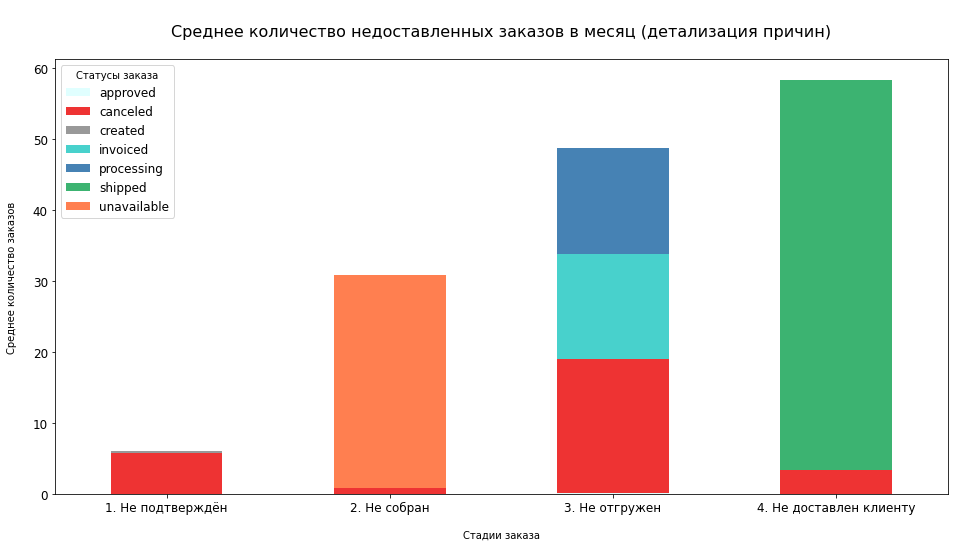

In [42]:
# Визуализация результата
colors = ["#E0FFFF", "#e33", "#999", "#48D1CC", "#4682B4", "#3CB371", "#FF7F50"]
customers_tears.plot(kind="bar", stacked=True, color=colors)
plt.title("\nСреднее количество недоставленных заказов в месяц (детализация причин)\n")
plt.xlabel("\nСтадии заказа")
plt.xticks(rotation=0)
plt.ylabel("Среднее количество заказов\n")
plt.legend(title="Статусы заказа")

In [43]:
customers_tears

order_status,approved,canceled,created,invoiced,processing,shipped,unavailable
stage,,,,,,,
1. Не подтверждён,NaN,5.80,0.25,NaN,NaN,NaN,NaN
2. Не собран,NaN,0.80,NaN,NaN,NaN,NaN,30.1
3. Не отгружен,0.1,18.90,NaN,14.8,14.95,NaN,NaN
4. Не доставлен клиенту,NaN,3.45,NaN,NaN,NaN,54.85,NaN


### 2.3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [44]:
# Объединяем order_items_df с sales_df, чтобы для каждого товара в каждом заказе определить дату продажи
product_df = pd.merge(
    order_items_df[["order_id", "product_id"]],
    sales_df[["order_id", "sale_date"]],
    on="order_id",
)

# Определяем из дат продаж день недели
product_df["sale_day_of_week"] = product_df["sale_date"].dt.day_name()
product_df.head(3)

,order_id,product_id,sale_date,sale_day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:48:30,Sunday


In [45]:
# В какой день недели каждый товар чаще всего покупается.
products_days = (
    product_df.groupby(["product_id", "sale_day_of_week"], as_index=False)
    .agg(
        {"order_id": "count"}
    )  # подсчитываем кол-во продаж товара в разрезе товар и день недели
    .rename(columns={"order_id": "quantity"})
    .sort_values(
        "quantity", ascending=False
    )  # сортируем по уменьшению количества проданного товара в этот день
    .drop_duplicates(
        subset=["product_id"]
    )  # оставляем только первый максимальный результат по каждому товару
    .reset_index(drop=True)  # обновляем индексацию таблицы
)

# === Искомый результат ===
products_days

,product_id,sale_day_of_week,quantity
0,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
1,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
2,422879e10f46682990de24d770e7f83d,Tuesday,89
3,99a4788cb24856965c36a24e339b6058,Tuesday,82
4,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
32782,63f52009dc3ddb733394e80183aed0f0,Saturday,1
32783,63f7a4366da7b3a3cb5bd2336ca15f7e,Friday,1
32784,63f916d8413bc439687d549e937d5b67,Saturday,1
32785,63f9b908e4626ece2e47cec24ff8dd9c,Thursday,1


В данном варианте подсчитывается количество каждого проданного товара в определенный день недели.  
Если в заказе несколько одинаковых товаров, то каждый из них учитывается как продажа этого товара.  
Необходимости выводить несколько дней в случае, если количеств продаж в разные дни недели было одинаковым, - нет (на значимом количестве (более 7 в день) таких совпадений не обнаружено).

<<<  Дополнительная часть  >>>

In [46]:
# топ-10/100/1000 посмотреть будет ли отрыв по определенному дню недели
top_products = order_items_df.product_id.value_counts().head(100).index.to_list()
top_products[0:5]

['aca2eb7d00ea1a7b8ebd4e68314663af',
 '99a4788cb24856965c36a24e339b6058',
 '422879e10f46682990de24d770e7f83d',
 '389d119b48cf3043d311335e499d9c6b',
 '368c6c730842d78016ad823897a372db']

In [47]:
# Оставляем значения только топовых продуктов в датафрейме, фильтруя товары по соответствующему списку
top_products_days = (
    product_df[product_df["product_id"].isin(top_products)]
    .groupby("sale_day_of_week", as_index=False)
    .agg({"order_id": "count"})
    .rename(columns={"order_id": "quantity"})
)

# добавим столбец с соотношением кол-ва приобретенных заказов в этот день недели к общему кол-ву приобретенных заказов
top_products_days["ratio"] = (
    top_products_days.quantity / top_products_days.quantity.sum()
)
top_products_days

,sale_day_of_week,quantity,ratio
0,Friday,2146,0.150028
1,Monday,1755,0.122693
2,Saturday,1790,0.125140
3,Sunday,1166,0.081516
4,Thursday,2247,0.157089
5,Tuesday,2849,0.199175
6,Wednesday,2351,0.164360


Покупают меньше всего с субботы по понедельник (провал в воскресенье) и больше всего - во вторник.

Распределение по популярным для покупки дням недели для топ-10 / 100 / 1000 / 10000 / всех товаров почти не отличается (диапазон колебаний по каждому дню около 1% от общей суммы).

Вывод: _<дописать!>_

### 2.4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [48]:
# Как обычно создадим временный новый датафрейм из копии датафрейма продаж для сохранности используемых данных
temp3_df = sales_df.copy()

# Создаём столбец со значением год-месяц
temp3_df["year_month"] = temp3_df["sale_date"].dt.to_period("M")

# Создаём столбец, для расчета кол-во недель в месяце (кол-во дней в месяце деленное на 7)
temp3_df["divider"] = (temp3_df["sale_date"].dt.days_in_month) / 7

# Столбец со значением среднего для одной продажи в месяце
temp3_df["ratio"] = 1 / temp3_df.divider
temp3_df.head(3)

,customer_unique_id,order_id,sale_date,items,total_cost,year_month,divider,ratio
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,1,38.71,2017-10,4.428571,0.225806
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,1,141.46,2018-07,4.428571,0.225806
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,1,179.12,2018-08,4.428571,0.225806


In [49]:
# Расчет среднего количества покупок в неделю на пользователя по месяцам
useless_mean_ever = pd.pivot_table(
    temp3_df,
    values="ratio",
    index=["customer_unique_id"],
    columns=["year_month"],
    aggfunc="sum",
)

useless_mean_ever = useless_mean_ever.fillna(0)
useless_mean_ever

year_month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.225806,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.225806,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.00,0.225806,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.225806,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.233333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.00,0.000000,0.0,0.000000,0.233333,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.225806,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [50]:
# Если желаете скачать результат, то раскоментируйте и запустите ячейку

# useless_mean_ever.to_excel("useless_mean_ever.xlsx")

### 2.5_1. Когортный анализ пользователей.

In [51]:
# Определяем когорты как первый месяц (минимальный) покупки
cohorts_df = (
    temp3_df.groupby("customer_unique_id", as_index=False)
    .agg({"year_month": "min"})
    .rename(columns={"year_month": "cohorts"})
)

cohorts_df

,customer_unique_id,cohorts
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
95116,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
95117,fffea47cd6d3cc0a88bd621562a9d061,2017-12
95118,ffff371b4d645b6ecea244b27531430a,2017-02
95119,ffff5962728ec6157033ef9805bacc48,2018-05


In [52]:
# определяем месяцы жизни когорты
merged_df = pd.merge(
    temp3_df[["customer_unique_id", "year_month"]],
    cohorts_df[["customer_unique_id", "cohorts"]],
    on="customer_unique_id",
)

merged_df

,customer_unique_id,year_month,cohorts
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09
2,af07308b275d755c9edb36a90c618231,2018-07,2018-07
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
4,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
...,...,...,...
98348,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03
98349,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02
98350,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08
98351,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01


In [53]:
# проставим для каждой покупки соответствующий порядковый номер периода жизни когорты
merged_df["cohorts_period"] = merged_df["year_month"] - merged_df["cohorts"]
merged_df["cohorts_period"] = merged_df.cohorts_period.apply(lambda x: x.n) + 1
merged_df

,customer_unique_id,year_month,cohorts,cohorts_period
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,2
1,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09,1
2,af07308b275d755c9edb36a90c618231,2018-07,2018-07,1
3,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,1
4,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11,1
...,...,...,...,...
98348,6359f309b166b0196dbf7ad2ac62bb5a,2017-03,2017-03,1
98349,da62f9e57a76d978d02ab5362c509660,2018-02,2018-02,1
98350,737520a9aad80b3fbbdad19b66b37b30,2017-08,2017-08,1
98351,5097a5312c8b157bb7be58ae360ef43c,2018-01,2018-01,1


In [54]:
# Таблица с абсолютными значениями по User retention rate
cohorts_pt = pd.pivot_table(
    merged_df,
    values="customer_unique_id",
    index=["cohorts"],
    columns=["cohorts_period"],
    aggfunc="count",
)

cohorts_pt

cohorts_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
cohorts,,,,,,,,,,,,,,,,,,,
2017-01,753.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1715.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,5.0,NaN
2017-03,2656.0,14.0,9.0,11.0,9.0,4.0,4.0,9.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2346.0,15.0,6.0,5.0,7.0,6.0,9.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3631.0,20.0,18.0,14.0,11.0,15.0,17.0,5.0,9.0,12.0,10.0,12.0,8.0,2.0,8.0,11.0,NaN,NaN,NaN
2017-06,3183.0,15.0,12.0,12.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,7.0,NaN,NaN,NaN,NaN
2017-07,3870.0,22.0,13.0,7.0,15.0,7.0,12.0,4.0,8.0,10.0,8.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4253.0,28.0,17.0,11.0,16.0,24.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4186.0,27.0,20.0,18.0,17.0,15.0,9.0,9.0,13.0,8.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# выделяем значения количества продаж в первом периоде для дальнейшего расчета относительного User retention rate
cohorts_group_size = (
    merged_df.query("cohorts_period == 1")
    .groupby("cohorts")
    .agg({"cohorts_period": "count"})
    .rename(columns={"cohorts_period": "cohort_size"})
)

cohorts_group_size_ser = cohorts_group_size.iloc[:, 0]
cohorts_group_size_ser

cohorts
2017-01     753
2017-02    1715
2017-03    2656
2017-04    2346
2017-05    3631
2017-06    3183
2017-07    3870
2017-08    4253
2017-09    4186
2017-10    4440
2017-11    7184
2017-12    5662
2018-01    7002
2018-02    6552
2018-03    7119
2018-04    6604
2018-05    6846
2018-06    5964
2018-07    6011
2018-08    6425
Freq: M, Name: cohort_size, dtype: int64

In [56]:
# Таблица относительного User retention rate
user_retention = cohorts_pt.divide(cohorts_group_size_ser, axis=0).round(5)
user_retention.fillna("-")

cohorts_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20
cohorts,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.00531,0.00266,0.00133,0.00398,0.00133,0.00398,0.00133,0.00133,-,0.00266,0.00266,0.00664,0.00398,0.00133,0.00133,0.00266,0.00398,0.00133
2017-02,1.0,0.00233,0.00233,0.00175,0.00408,0.00117,0.00233,0.00175,0.00058,0.00175,0.00117,0.00292,0.00117,0.00175,0.00117,0.00058,0.00058,0.00292,-
2017-03,1.0,0.00527,0.00339,0.00414,0.00339,0.00151,0.00151,0.00339,0.00301,0.00113,0.00377,0.00113,0.00226,0.00113,0.00151,0.00226,0.00075,0.00151,-
2017-04,1.0,0.00639,0.00256,0.00213,0.00298,0.00256,0.00384,0.00256,0.00341,0.00171,0.00213,0.00085,0.00085,0.00043,0.00085,0.00085,0.00213,-,-
2017-05,1.0,0.00551,0.00496,0.00386,0.00303,0.00413,0.00468,0.00138,0.00248,0.0033,0.00275,0.0033,0.0022,0.00055,0.0022,0.00303,-,-,-
2017-06,1.0,0.00471,0.00377,0.00377,0.00251,0.00346,0.00377,0.0022,0.00126,0.0022,0.00314,0.00377,0.00157,0.00126,0.0022,-,-,-,-
2017-07,1.0,0.00568,0.00336,0.00181,0.00388,0.00181,0.0031,0.00103,0.00207,0.00258,0.00207,0.0031,0.00129,0.00258,-,-,-,-,-
2017-08,1.0,0.00658,0.004,0.00259,0.00376,0.00564,0.00259,0.00259,0.00118,0.00165,0.00235,0.00165,0.00118,-,-,-,-,-,-
2017-09,1.0,0.00645,0.00478,0.0043,0.00406,0.00358,0.00215,0.00215,0.00311,0.00191,0.00263,0.00072,-,-,-,-,-,-,-


<span style="color:red">!!! _<Анализ и выводы>_ </span>

<span style="color:red">!!! _<Анализ и выводы>_ </span>

### 2.5_2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

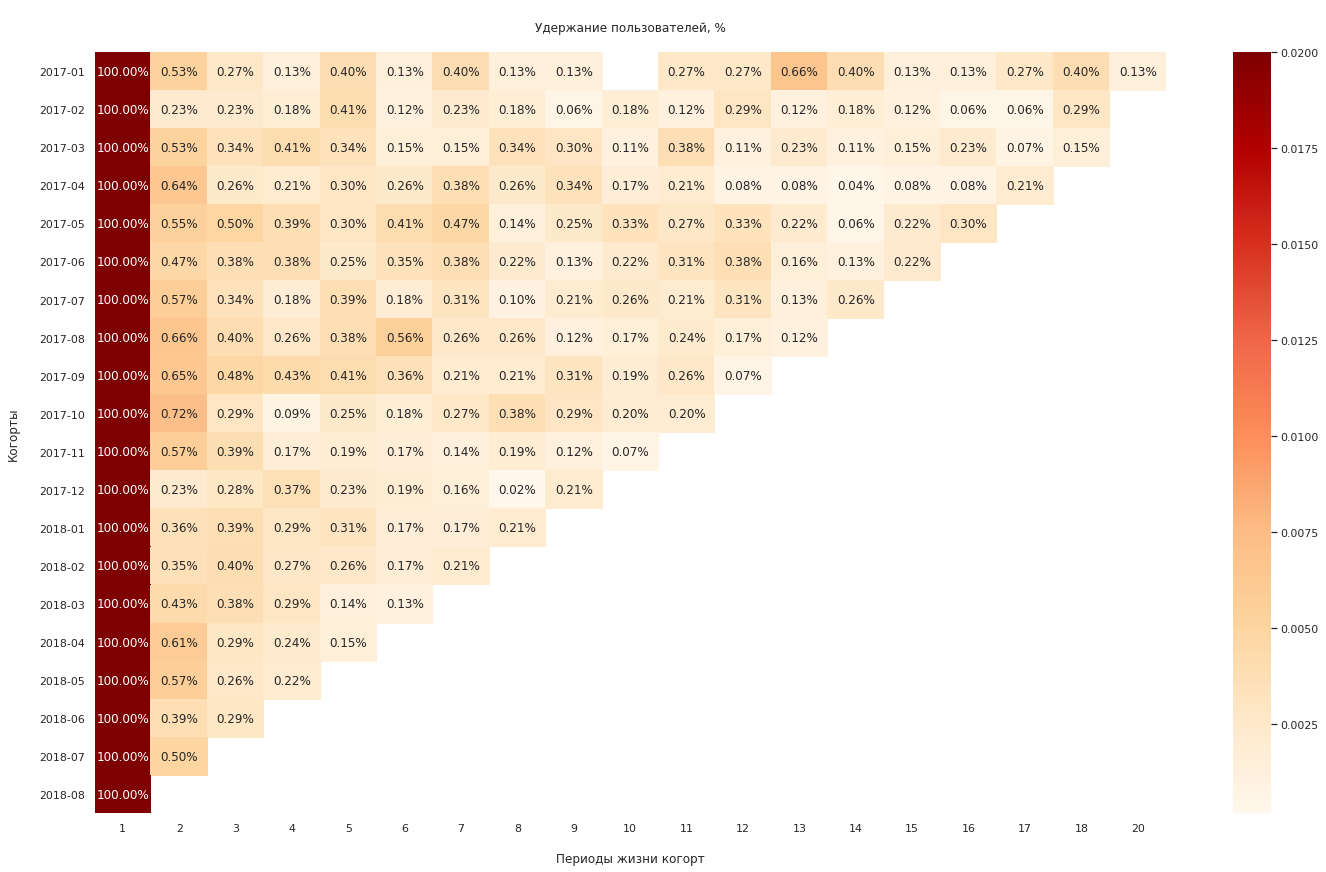

In [57]:
# Визуализируем полученную ранее таблицу относительного User retention rate в виде тепловой карты

sns.set(style="white")  # устанавливаем белый стиль для графика
plt.figure(figsize=(24, 14))  # указываем ширину и высоту фигуры в дюймах
sns.heatmap(
    user_retention,
    cmap="OrRd",  # выбор цветового набора
    vmax=0.02,  # сильно сместим максимальное значение для палитры, чтобы увидеть цветовую градацию.
    fmt=".2%",  # определение формата значений как проценты и 2 знака после запятой
    mask=user_retention.isnull(),  # скрытие пустых ячеек
    annot=True,
)
# числовые значения корреляции отображаются внутри ячеек
# подписываем название графика и оси
plt.title("\nУдержание пользователей, %\n")
plt.xlabel("\nПериоды жизни когорт")
plt.ylabel("Когорты\n")

Retention на 3-й месяц означает покупку на 4-й месяц существовании когорты.  
На тепловой карте легко находим такую - когорта "2017-09", то есть пользователи совершившие свою первую покупку в сентябре мае 2017-го.

In [58]:
# Проверим:

user_retention.iloc[:, 3].idxmax()

Period('2017-09', 'M')

### 2.6. Построить RFM-сегментацию пользователей для качественной оценки своей аудитории.

<  Переработать!  >  

В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.  
Подробно опиши, как ты создавал кластеры.  
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.  
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик   
- recency от 130 до 500 дней, 
- frequency от 2 до 5 заказов в неделю, 
- monetary от 1780 до 3560 рублей в неделю.

In [59]:
#

df2 = sales_df.copy()
df2.head(3)

,customer_unique_id,order_id,sale_date,items,total_cost
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,1,38.71
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,1,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,1,179.12


In [60]:
final_date = df2["sale_date"].max() + timedelta(days=1)
final_date

Timestamp('2018-08-30 15:10:26')

In [61]:
# period = (final_date - df2.sale_date.min()).days
# 602

period = 365

In [62]:
df2["days_since_sale"] = df2.sale_date.apply(lambda x: (final_date - x).days)
df2.head(3)

,customer_unique_id,order_id,sale_date,items,total_cost,days_since_sale
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,1,38.71,332
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,1,141.46,35
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,1,179.12,22


In [63]:
rfm_df = (
    df2.query("days_since_sale <= 365")
    .groupby("customer_unique_id", as_index=False)
    .agg({"days_since_sale": "min", "order_id": "count", "total_cost": "sum"})
    .rename(
        columns={
            "days_since_sale": "recency",
            "order_id": "frequency",
            "total_cost": "monetary",
        }
    )
)

rfm_df

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
3,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
4,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
...,...,...,...,...
74044,fffb09418989a0dbff854a28163e47c6,254,1,73.16
74045,fffbf87b7a1a6fa8b03f081c5f51a201,245,1,167.32
74046,fffcc512b7dfecaffd80f13614af1d16,141,1,710.70
74047,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58


Для recency (времени от последней покупки) опеределим следующие границы метрики в днях:  
1) 90;  
2) 91 - 182;  
3) 183+.  

In [64]:
r_border1 = 90
r_border2 = 182

In [65]:
# Рассмотрим распределение по частоты покупок
rfm_df.frequency.value_counts()

1     72172
2      1749
3       101
4        17
5         5
7         3
11        1
9         1
Name: frequency, dtype: int64

Для frequency (частоты) определим следующие границы метрики:  
1) одна покупка;  
2) две покупки;  
3) три и более покупок.  

In [66]:
# Рассмотрим распределение метрики суммы покупок
rfm_df.monetary.describe()

count    74049.000000
mean       165.638620
std        224.820192
min          9.590000
25%         63.220000
50%        108.350000
75%        182.860000
max      13664.080000
Name: monetary, dtype: float64

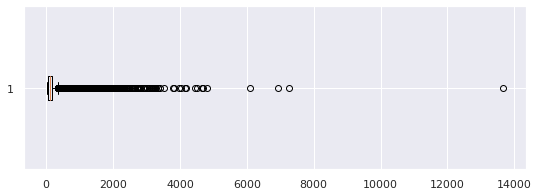

In [67]:
# Небольшая визуализация распределения суммы покупок
sns.set_theme(style="darkgrid")
plt.figure(figsize=(9, 3))
plt.boxplot(rfm_df.monetary, vert=False)
# чтобы скрыть отображение выбросов добавьте  showfliers=False

Разница между 75-м квантилем и максимумом огромна. Довольно большое количество выбросов.
Делать границы метрики по квантилям будет ошибкой.

Так как 97% пользователей с 1 покупкой, то для наименования групп будет использовано слово "чек", а не "сумма покупок".

Для monetory (суммы покупок) определим следующие границы метрики:  
1) "низкий чек"  = от 0 до 35-го процентиля;  
2) "средний чек" = от 35-го до 70-го процентилей;  
3) "высокий чек" = от 70-го процентиля до значения выбросов;   
4) "крупный чек" = выбросы.  
3-я и 4-я группы по метрике в данной работе будут попадать в один сегмент, разделил для наглядности из-за большой разности суммы.

In [98]:
m_border1 = rfm_df.monetary.quantile(0.35).round(2)
m_border2 = rfm_df.monetary.quantile(0.70).round(2)
m_border3 = round(182.86 + (182.86 - 63.22) * 1.5, 2)

In [99]:
print(m_border1, m_border2, m_border3)

78.1 163.79 362.32


In [86]:
def r_score(x):
    if x <= r_border1:
        return 3
    if x <= r_border2:
        return 2
    else:
        return 1


def f_score(x):
    if x == 1:
        return 1
    if x == 2:
        return 2
    else:
        return 3


def m_score(x):
    if x <= m_border1:
        return 1
    if x <= m_border2:
        return 2
    if x <= m_border3:
        return 3
    else:
        return 4

In [88]:
rfm_df["r"] = rfm_df["recency"].apply(lambda x: r_score(x))
rfm_df["f"] = rfm_df["frequency"].apply(lambda x: f_score(x))
rfm_df["m"] = rfm_df["monetary"].apply(lambda x: m_score(x))
rfm_df["rfm score"] = rfm_df["r"].map(str) + rfm_df["f"].map(str) + rfm_df["m"].map(str)
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,2,1,2,212,засыпающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211,засыпающие
2,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,1,1,111,потерянные
3,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,1,1,3,113,потерянные
4,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98,2,1,3,213,засыпающие


<span style="color:red">!!! _<Переделать описание сегментов согласно заданию>_ Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.</span>

# Сегментация и коммуникация для сегментов.  

Потерянные.  
RFM: 111, 112, 113, 114.  
Recency=1 (от полугода до года), frequency=1 (одна покупка), monetary - все варианты.  
Давние клиенты, которые совершили всего одну покупку.  
Обычно с ними не взаимодействуют. Отток клиентов неизбежен, поэтому лучшее решение — сэкономить время и бюджет рекламной кампании.

Под угрозой оттока. Клиенты, которые покупали давно, но совершили больше одной покупки — 121, 122, 123, 124. Попробуйте рассказать им об акциях, предложите скидку на повторный заказ и попытайтесь узнать, почему они перестали к вам обращаться.

Бывшие лояльные. Потребители, которые раньше часто покупали на разные чеки, но перестали со временем — 131, 132, 133. Сделайте промо-рассылку для этих сегментов и предложите долгосрочную мотивацию — например, бонусную систему.

Засыпающие. Давность и частота ниже среднего. Потеряет их, если не активировать повторно — 211, 212, 213. Промо-рассылка,  предложите скидку на повторный заказ. 

Тамагочи (нуждающиеся во внимании). Давность, частота и денежная стоимость выше среднего. Хотя, возможно, купил не совсем недавно — 221, 222, 223. Промо-рассылка, узнать, почему они перестали к вам обращаться.

Лояльные. Потребители, которые часто заказывают на средний чек или большой чеки — 232, 233, 332. Чтобы сохранить их интерес, предлагайте подарки и сопутствующие товары.

Новички. Клиенты, которые недавно совершали сделку — 311, 312, 313. Обязательно взаимодействуйте с новыми потребителями — они нередко откликаются на информационные рассылки, приглашения перейти в блог компании и ознакомиться с обучающим контентом.

Перспективные. Новые клиенты с большим чеком — 313, регулярные клиенты с большим чеком — 323. Чтобы сохранить их интерес, предлагайте подарки и сопутствующие товары.

Идеальные. Клиенты, которые заказывают много и часто — 333. Рекламные кампании для идеальных потребителей рассчитаны на то, чтобы их удержать, поэтому акцентируйте внимание не на скидках, а на персональном обслуживании и приглашениях на мероприятия бренда.

In [89]:
segment_map = {
    r"11": "потерянные",
    r"12": "под угрозой",
    r"1[3-4]": "бывшие лояльные",
    r"21": "засыпающие",
    r"22": "тамагочи",
    r"2[3-4]": "лояльные",
    r"31": "новички",
    r"32": "перспективные",
    r"3[3-4]": "идеальные",
}

rfm_df["segment"] = rfm_df["r"].map(str) + rfm_df["f"].map(str)
rfm_df["segment"] = rfm_df["segment"].replace(segment_map, regex=True)
rfm_df.head(3)

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,2,1,2,212,засыпающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211,засыпающие
2,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,1,1,1,111,потерянные


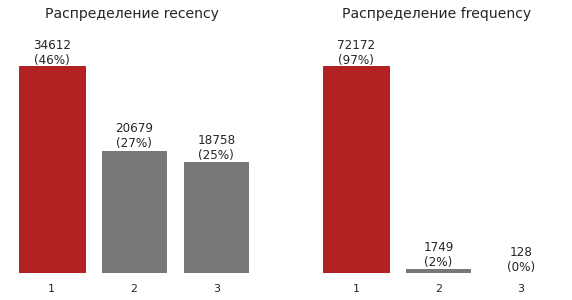

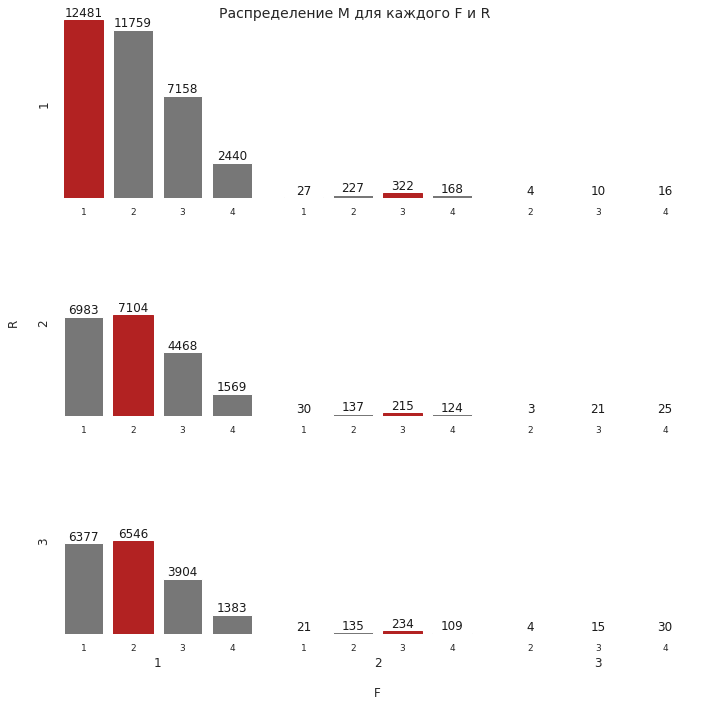

In [90]:
# график распределения сегментации покупателей по частоте и давности последней покупки
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(["r", "f"]):
    parameters = {"r": "recency", "f": "frequency"}
    y = rfm_df[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color="#777")
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_xticks(x)  # указываем значения для делений по оси X
    ax.set_title("Распределение {} \n\n".format(parameters[p]), fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color("firebrick")
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            value,
            "{}\n({}%)".format(int(value), int(value * 100 / y.sum())),
            ha="center",
            va="bottom",
        )


# График распределения сегментации суммы покупки по частоте и давности последней покупки
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=True, figsize=(10, 10))

r_range = range(1, 4)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:
        y = (
            rfm_df[(rfm_df["r"] == r) & (rfm_df["f"] == f)]["m"]
            .value_counts()
            .sort_index()
        )
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color="#777")
        if r == 3:
            if f == 2:
                ax.set_xlabel("{}\n\nF".format(f), va="top")
            else:
                ax.set_xlabel("{}\n".format(f), va="top")
        if f == 1:
            if r == 2:
                ax.set_ylabel("R\n\n{}".format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=9)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color("firebrick")
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                value,
                int(value),
                ha="center",
                va="bottom",
                color="k",
            )

fig.suptitle("Распределение M для каждого F и R", fontsize=14)
plt.tight_layout()

Распределение по давности покупок. Плохой сигнал что группа "2" опережает по количеству группу "3", это означает снижение количества покупок за последние 3 месяца к предыдущим 3 месяцам примерно на 9%.

Распределение по частоте покупок - одручающее. На платформе представлен широкий спектр товаров различного предназначения, а количество повторных покупок слишком мало. Условия сервиса не могут быть настолько ужасными, чтобы отсеивать 97% покупателей, при количестве отмен менее 0,5% от оплаченных заказов.  
Скорее всего выборка нерепрезентативна. О чем также свидетельствует количество ежемесячного притока пользователей (см. выше  "когорты"). Приток количества новых пользователей на подобную платформу в её первый год запуска должен ежемесячно показывать существенный рост.

Чем больше покупок, тем выше итоговая сумма (сегмент по "M" от "F"), что логично.

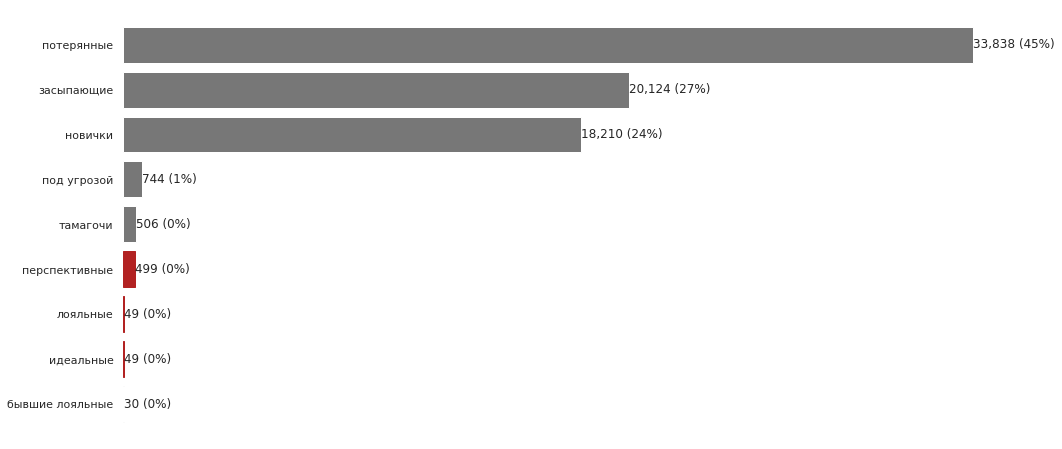

In [91]:
# Расчет количества покупателей в каждом сегменте
segments_counts = rfm_df["segment"].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts, color="#777")
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
    value = bar.get_width()
    if segments_counts.index[i] in ["идеальные", "лояльные", "перспективные"]:
        bar.set_color("firebrick")
    ax.text(
        value,
        bar.get_y() + bar.get_height() / 2,
        "{:,} ({:}%)".format(int(value), int(value * 100 / segments_counts.sum())),
        va="center",
        ha="left",
    )

Картина печальная:  
3/4 - либо потерянные, либо засыпающие.  
Оставшаяся 1/4 - новички и небольшая группа потенциальных и постоянных крупных покупателей (около 1% от всех).

Сперва результат с проверкой.  
Добавление комментариев.  
Проверка графиков с описанием на русском. 
Выводы.  
Гипотезы и Прогнозы. Предложения по реализации оптимальных веток развития событий.  
Проверка орфографии и пунктуации.  

RFM-аналитика помогает онлайн бизнесу повышать продажи и отклик аудитории, сокращать расходы на рекламу, делать маркетинг персонализированным и эффективным.

In [75]:
# Статистика из интернета (то, что было на поверхности):
# Google: In Brazil, the average eCommerce purchase (average cart price) for 2018 was $119 (средний чек)
# 2018 год - в среднем бразильцы тратили на онлайн покупки 1914 реалов в год (ок. $570, курс реала упал)
# 2017 год - в среднем бразильцы тратили на онлайн покупки 1787 реалов в год (ок. $520)
# 2016 год - предположим $460.
# 2015 год: "В среднем каждый онлайн-покупатель из Бразилии тратит $376 ежегодно."

# Опираемся на более-менее достоверную информацию:

In [76]:
# В странах Латинской Америки есть свои локальные проблемы с доставкой грузов:

# Плохая инфраструктура, множество грунтовых дорог в сельской местности.
# Сложная местность, в таких регионах, как тропические леса Амазонки или Анды.
# Отсутствие адресов на карте, несогласованные почтовые индексы и адресные системы, могут привести к ошибкам доставки.
# Риск хищения грузов в районах с высоким уровнем преступности.

In [77]:
# Местные почтовые службы, такие как Correios в Бразилии, могут доставить заказ по всей стране
# по относительно низкой цене, но время доставки часто непредсказуемо и продолжительно.

In [78]:
# высокий уровень преступности
# даже в безопасных районах есть риск, что товар украдут, особенно из пункта самовывоза.

In [79]:
# Возвраты
# Возвраты товаров – одна из главных проблем для международной торговли.
# Законы о защите прав потребителей позволяют отказаться от товара и запросить полный возврат денежных средств (до 7 дней в Бразилии).
# Причем вы обязаны вернуть деньги в этот срок, иначе покупатель может пожаловаться в агентство по защите прав потребителей.
# А поскольку логистика дорогая, продавец теряет прибыль на обратной доставке, или товар попросту утилизируют.